In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [67]:
datasets = ['sift0.1m', 'sift0.2m', 'sift0.5m', 'sift2m', 'sift5m']

colors = ['purple', 'steelblue', 'green', 'orange', 'tomato']

indices = ['hnsw', 'vamana', 'hcnng']

knn = 10

output = '../output/waste/'

figures = '../figures/waste/'

num_datasets = len(datasets)

num_indices = len(indices)

In [68]:
import os
os.makedirs(figures, exist_ok=True)

In [69]:
def DatasetIndice2Str(ds: str, ind: str) -> str:
  return ds + '_' + ind

files = {}
for i in range(num_datasets):
  ds = datasets[i]
  for j in range(num_indices):
    ind = indices[j]
    # baseline and cspg output csv filenames
    dic = {}
    dic['bsl'] = f'{ds}_{ind}_baseline.csv'
    # dic['rpg'] = f'{ds}_{ind}_cspg_2.csv'
    files[DatasetIndice2Str(ds, ind)] = dic

files

{'sift0.1m_hnsw': {'bsl': 'sift0.1m_hnsw_baseline.csv'},
 'sift0.1m_vamana': {'bsl': 'sift0.1m_vamana_baseline.csv'},
 'sift0.1m_hcnng': {'bsl': 'sift0.1m_hcnng_baseline.csv'},
 'sift0.2m_hnsw': {'bsl': 'sift0.2m_hnsw_baseline.csv'},
 'sift0.2m_vamana': {'bsl': 'sift0.2m_vamana_baseline.csv'},
 'sift0.2m_hcnng': {'bsl': 'sift0.2m_hcnng_baseline.csv'},
 'sift0.5m_hnsw': {'bsl': 'sift0.5m_hnsw_baseline.csv'},
 'sift0.5m_vamana': {'bsl': 'sift0.5m_vamana_baseline.csv'},
 'sift0.5m_hcnng': {'bsl': 'sift0.5m_hcnng_baseline.csv'},
 'sift2m_hnsw': {'bsl': 'sift2m_hnsw_baseline.csv'},
 'sift2m_vamana': {'bsl': 'sift2m_vamana_baseline.csv'},
 'sift2m_hcnng': {'bsl': 'sift2m_hcnng_baseline.csv'},
 'sift5m_hnsw': {'bsl': 'sift5m_hnsw_baseline.csv'},
 'sift5m_vamana': {'bsl': 'sift5m_vamana_baseline.csv'},
 'sift5m_hcnng': {'bsl': 'sift5m_hcnng_baseline.csv'}}

<>:29: SyntaxWarning: "is not" with 'str' literal. Did you mean "!="?
<>:29: SyntaxWarning: "is not" with 'str' literal. Did you mean "!="?
/tmp/ipykernel_403211/3956199695.py:29: SyntaxWarning: "is not" with 'str' literal. Did you mean "!="?
  axes[i].set_title(f'CSPG-{ind.upper() if ind is not 'vamana' else 'Vamana'}')


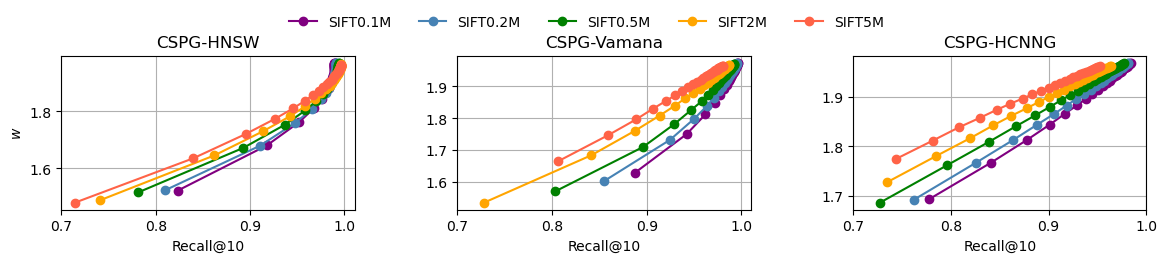

In [70]:
low_recall = 0.7

gap_recall = 0.1

leg = []

for ds in datasets:
  leg += [ds.upper()]

fig, axes = plt.subplots(nrows=1, ncols=num_indices, figsize=(14, 2))
axes[0].set_ylabel('$w$') 
for i in range(num_indices):
  ind = indices[i]
  for k, color in zip(range(num_datasets),colors):
    ds = datasets[k]
    bsl = pd.read_csv(output+files[DatasetIndice2Str(ds, ind)]['bsl'])
    # rpg = pd.read_csv(output+files[DatasetIndice2Str(ds, ind)]['rpg'])
    bsl['w'] = 1 + bsl['w']
    # rpg['QPS'] = rpg['num_queries'] / rpg['query_time']
    bsl = bsl[bsl['recall'] > low_recall]
    # rpg = rpg[rpg['recall'] > low_recall]
    # print(rpg['QPS'], bsl['QPS'])
    axes[i].plot(bsl['recall'], bsl['w'], marker='o', color=color)
    # axes[i].plot(rpg['recall'], rpg['QPS'], marker='^')
  axes[i].set_xlabel(f'Recall@{knn}')
  axes[i].set_xticks(np.arange(low_recall, 1.001, gap_recall))
  # axes[i].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
  axes[i].grid(True)
  axes[i].set_title(f'CSPG-{ind.upper() if ind is not 'vamana' else 'Vamana'}')

fig.subplots_adjust(wspace=0.35)
fig.legend(leg, loc='center', bbox_to_anchor=(0.5, 1.05), ncol=num_indices * 2, frameon=False)
fig.savefig(figures+f'waste.pdf', dpi=300, bbox_inches='tight')
fig.show()